FONTE: https://www.kaggle.com/zalando-research/fashionmnist

### Dataset
Fashion-MNIST é um conjunto de dados das imagens dos artigos de Zalando - consistindo em um conjunto de treinamento de 60.000 exemplos e um conjunto de testes de 10.000 exemplos. Cada exemplo é uma imagem em escala de cinza de 28 x 28, associada a um rótulo de 10 classes. Zalando pretende que o Fashion-MNIST sirva como substituto direto do conjunto de dados MNIST original para algoritmos de aprendizado de máquina de benchmarking. Ele compartilha o mesmo tamanho de imagem e estrutura de divisões de treinamento e teste.

O conjunto de dados MNIST original contém muitos dígitos manuscritos. Os membros da comunidade de AI / ML / Ciência de dados amam esse conjunto de dados e o usam como referência para validar seus algoritmos. De fato, o MNIST é frequentemente o primeiro grupo de dados que os pesquisadores tentam. "Se não funcionar no MNIST, não funcionará", disseram eles. "Bem, se funcionar no MNIST, ainda poderá falhar nos outros."

Zalando procura substituir o conjunto de dados MNIST original

### Conteúdo
Cada imagem tem 28 pixels de altura e 28 pixels de largura, totalizando 784 pixels no total. Cada pixel tem um único valor de pixel associado, indicando a claridade ou a escuridão desse pixel, com números mais altos significando mais escuros. Esse valor de pixel é um número inteiro entre 0 e 255. Os conjuntos de dados de treinamento e teste possuem 785 colunas. A primeira coluna consiste nos rótulos das classes (veja acima) e representa o artigo de vestuário. O restante das colunas contém os valores de pixel da imagem associada.

Para localizar um pixel na imagem, suponha que decompusemos x como x = i * 28 + j, onde i e j são números inteiros entre 0 e 27. O pixel está localizado na linha i e na coluna j de uma matriz 28 x 28 .
Por exemplo, pixel31 indica o pixel que está na quarta coluna da esquerda e a segunda linha da parte superior, como no diagrama ascii abaixo.

Cada exemplo de treinamento e teste é atribuído a um dos seguintes rótulos:

0 Camiseta / top

1 calça

2 Pulôver

3 Vestido

4 Casaco

5 Sandália

6 Camisa

7 Sapatilha

8 Bag

9 Bota no tornozelo

TL; DR

Cada linha é uma imagem separada.
A coluna 1 é o rótulo da classe.
As colunas restantes são números de pixels (784 no total).
Cada valor é a "escuridão" do pixel (1 a 255)

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('fashion-mnist_train.csv')

In [4]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

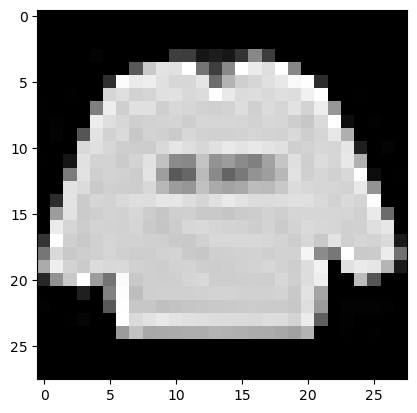

In [6]:
# Imprimindo um objeto do dataset
plt.imshow(data.values[0][1:].reshape(28,28), cmap='gray', interpolation='none')
plt.show()

### A atividade consiste em utilizar o KNN para classificar as imagens do fmnist

## Importando bibliotecas que vão ser utilizadas

In [53]:
# Biblioteca para criar nosso modelo de ML
from sklearn import preprocessing, model_selection, neighbors
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## import warnings
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=FutureWarning, module='sklearn')
warnings.filterwarnings(action='ignore', category=DataConversionWarning, module='sklearn')


## Importando data sets de treino e teste

In [8]:
data_train = pd.read_csv('fashion-mnist_train.csv')
data_test = pd.read_csv('fashion-mnist_test.csv')

## Separando as features e targets

In [9]:
import numpy as np
X_train= data_train.drop(['label'], axis=1)
y_train = data_train['label']
X_test = data_test.drop(['label'], axis=1)
y_test = data_test['label']


## Normalizando os valores

In [10]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Calculando a accuracy pra diferentes K's

In [11]:
kVals = range(1, 30, 2)
accuracies = []
better_k = 0.0
for k in kVals:
        # train the k-Nearest Neighbor classifier with the current value of `k`
        model = neighbors.KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        model.fit(X_train, y_train)
        # evaluate the model and update the accuracies list
        score = model.score(X_test, y_test)
        if score > better_k:
            better_k = score
        print("k=%d, accuracy=%.2f%%" % (k, score * 100))
        accuracies.append(score)
        
print("Melhor paramentro k=%d, accuracy=%.2f%%" % (k, score * 100))

k=1, accuracy=85.67%
k=3, accuracy=85.89%
k=5, accuracy=86.30%
k=7, accuracy=86.09%
k=9, accuracy=85.95%
k=11, accuracy=85.88%
k=13, accuracy=85.71%
k=15, accuracy=85.43%
k=17, accuracy=84.96%
k=19, accuracy=84.76%
k=21, accuracy=84.51%
k=23, accuracy=84.49%
k=25, accuracy=84.34%
k=27, accuracy=84.26%
k=29, accuracy=84.19%
Melhor paramentro k=0, accuracy=84.19%


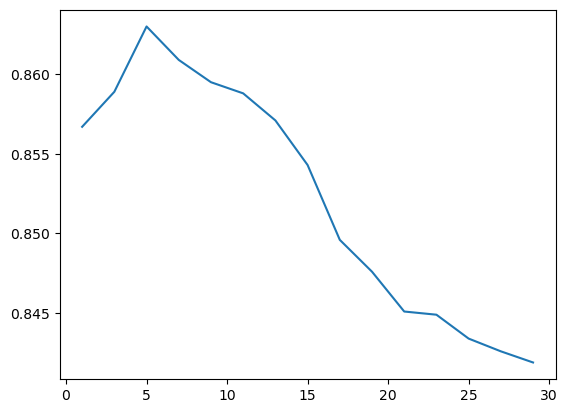

In [12]:
plt.plot(kVals, accuracies)

## Calculando modelo com k = 5

In [55]:
model = neighbors.KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1_score = f1_score(y_test, y_pred, average='weighted')
print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1_score}")

Acurácia: 0.863
Precisão: 0.8651866422959105
Recall: 0.863
F1: 0.8626280170251058


In [108]:
def plot_confusion_matrix(cm, labels):    
    plt.figure(figsize=(len(labels)+2, len(labels)+2))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Classe Predita')
    plt.ylabel('Classe Verdadeira')
    plt.title('Matriz de Confusão')
    plt.show()

def plot_classification_report(report, labels):
    # Obtendo as métricas para cada classe
    precision = [report[str(i)]['precision'] for i in range(len(report) - 3)]
    recall = [report[str(i)]['recall'] for i in range(len(report) - 3)]
    f1_score = [report[str(i)]['f1-score'] for i in range(len(report) - 3)]

    # Plotando o gráfico de barras
    x = np.arange(len(labels))
    width = 0.25
    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - width, precision, width, label='Precision')
    rects2 = ax.bar(x, recall, width, label='Recall')
    rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')
    
    ax.set_ylabel('Scores')
    ax.set_title('Desempenho por Classe')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    ax.legend()
    
    # Adicionando os valores acima das barras
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.2f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
#     plt.figure(figsize=(len(labels)+2, len(labels)+2))
    plt.ylim(0, 1.2)
    plt.tight_layout()
    plt.show()

## Matriz Confusão

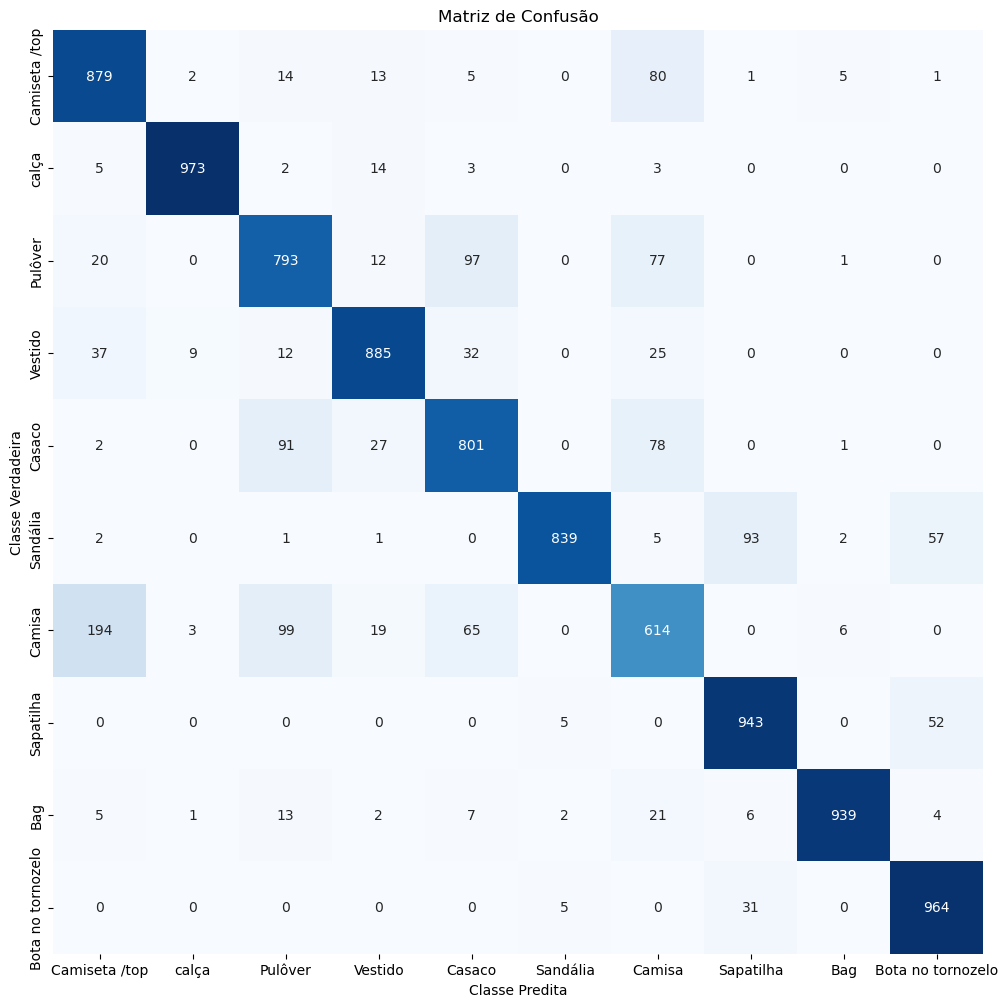

In [43]:
cm = confusion_matrix(y_test, y_pred)
labels = ['Camiseta /top','calça','Pulôver','Vestido','Casaco','Sandália','Camisa','Sapatilha','Bag','Bota no tornozelo']
plot_confusion_matrix(cm, labels)

## Classification Report

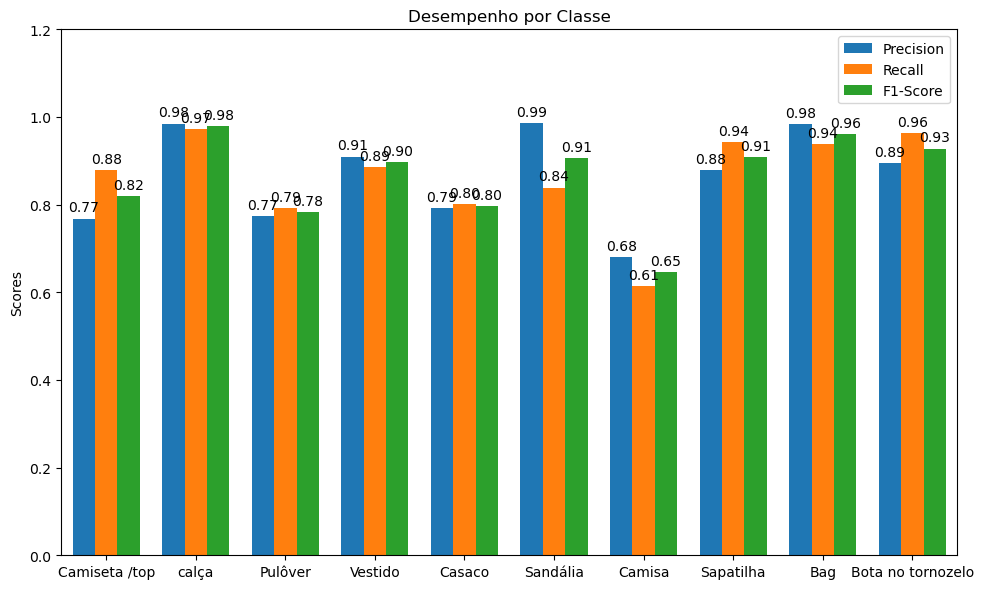

In [83]:
report = classification_report(y_test, y_pred, output_dict=True)
plot_classification_report(report, labels)